# 1. Introduction and Problem Statement

## Project Overview

In this project, we aim to classify accident sources based on textual data using various machine learning algorithms. The goal is to develop a model that can predict accident sources accurately, which can aid in understanding the patterns in accidents and help in mitigating future occurrences.

### Problem Statement

We are tasked with predicting the accident source (classification) using available data that contains accident-related information. By leveraging machine learning models, we can gain insights into how well the models perform on textual data and compare their performance.

### Dataset Description

The dataset used contains over 190,000 data points. It includes both textual features (such as accident descriptions) and numerical features that contribute to the classification process. The target variable is `covergae_code` and `accident_source`, which we aim to predict.

### Project Steps

1. Introduction and Problem Statement

2. Data Exploration

3. Data Preprocessing and Feature Engineering
   
4. Model selection and training using various machine learning algorithms.

5. Model evaluation using performance metrics like Precision and Recall.

6. Visualizing model performance and predictions.


# 2. Data Exploration

### Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import logging
import os
import warnings
warnings.filterwarnings("ignore")
import re
import string
from string import digits
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
)
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [72]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prasi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prasi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_excel("Dataset_Public.xlsx")

In [6]:
df.head()

,Claim Description,Coverage Code,Accident Source
0,THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...,AN,"Struck pedestrian, bicycle"
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...,GB,Elevator/Escalator
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COL...",AB,Sideswipe or lane change
3,CLAIMANT ALLEGES SHE WAS BURNED UNKNOWN DEGREE...,PA,Food Product
4,THE IV WAS MERGING INTO A CONSTRUCTION ZONE WH...,AD,Struck vehicle in rear


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191690 entries, 0 to 191689
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Claim Description  191463 non-null  object
 1   Coverage Code      191690 non-null  object
 2   Accident Source    191690 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [8]:
# Rename columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.columns

Index(['claim_description', 'coverage_code', 'accident_source'], dtype='object')

In [10]:
df.shape

(191690, 3)

In [11]:
df.describe()

,claim_description,coverage_code,accident_source
count,191463,191690,191690
unique,163990,43,312
top,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,AD,Alleged Negligent Act
freq,1057,50875,21284


In [12]:
df.duplicated().sum()

17633

In [13]:
df['claim_description'].duplicated().sum()

27699

In [14]:
df['coverage_code'].value_counts()

coverage_code
AD    50875
GB    33444
GD    26983
AP    23342
AB    14199
AL    10467
PA     8965
PB     5582
RB     5253
NS     2352
AU     1584
PM     1449
EL      906
AN      848
PL      739
GK      678
RC      656
PI      526
GO      403
AM      379
LL      282
DC      265
GL      250
EP      211
IK      184
OM      148
EO      143
PP      125
TE      124
IM       94
BM       74
BL       39
FB       33
CM       30
RF       17
OI       14
BR        8
RQ        6
EB        4
FF        3
LS        3
EI        2
PC        1
Name: count, dtype: int64

In [15]:
df['accident_source'].value_counts()

accident_source
Alleged Negligent Act            21284
Sideswipe or lane change         19220
Struck vehicle in rear           10676
Not Otherwise Classified          8359
Struck animal or object           8195
                                 ...  
Aircraft                            17
VEHICLE                             16
Insured Lost Control                16
Natural Hazard-Vegetation           16
Boiler, pressure vessel, etc.       16
Name: count, Length: 312, dtype: int64

In [16]:
description_counts = df['claim_description'].value_counts()
description_counts

claim_description
CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DAMAGE.                                                                                                                                                                            1057
ROCK FROM ROAD - NO ONE AT FAULT                                                                                                                                                                                                598
CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE DAMAGE.                                                                                                                                                                           432
PLAINTIFF ALLEGES INJURY CAUSED BY EMBEDDED BROKEN ARM OF PARAGARDIUD.                                                                                                                                                          311
WATER DAMAGE                                                          

In [17]:
# Filter for descriptions that appear more than 500 times
frequent_descriptions = description_counts[description_counts > 100].index
frequent_descriptions

Index(['CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DAMAGE.',
       'ROCK FROM ROAD - NO ONE AT FAULT',
       'CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE DAMAGE.',
       'PLAINTIFF ALLEGES INJURY CAUSED BY EMBEDDED BROKEN ARM OF PARAGARDIUD.',
       'WATER DAMAGE', 'CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DAMAGE',
       'IV REAR ENDED OV', 'NOT PROVIDED', 'ROCK FROM VEHICLE - NO LICENSE NO',
       'V1 HIT V2',
       'CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO THE VEHICLE.',
       'CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAMAGE.',
       'CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO VEHICLE', 'IV R/E OV',
       'V1 HIT PARKED V2', 'CPAP RECALL', 'V1 HIT V2 PARKED AND UNOCCUPIED',
       'OBJECT HIT GLASS', 'THEY SUFFERED GASTRIC ILLNESS'],
      dtype='object', name='claim_description')

In [18]:
df[df['claim_description']=='CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DAMAGE.']

,claim_description,coverage_code,accident_source
296,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
319,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
589,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
667,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
763,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
...,...,...,...
191123,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
191265,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
191523,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
191550,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole


In [19]:
df[df['claim_description']=='CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE DAMAGE.']

,claim_description,coverage_code,accident_source
81,CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE ...,GD,Pothole
899,CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE ...,GD,Pothole
1024,CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE ...,GD,Pothole
1350,CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE ...,GD,Pothole
1870,CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE ...,GD,Pothole
...,...,...,...
188307,CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE ...,GD,Pothole
189939,CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE ...,GD,Pothole
190056,CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE ...,GD,Pothole
190797,CLAIMANT DROVE OVER A POTHOLE CAUSING VEHICLE ...,GD,Pothole


In [20]:
df[df['claim_description']=='CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DAMAGE']

,claim_description,coverage_code,accident_source
49,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Not Otherwise Classified
810,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
1218,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
3568,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
3582,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Not Otherwise Classified
...,...,...,...
187461,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
187800,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
188647,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole
188907,CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...,GD,Pothole


In [21]:
df[df['claim_description']=='CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO THE VEHICLE.']

,claim_description,coverage_code,accident_source
3752,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
4082,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
4625,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
5485,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
8962,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
...,...,...,...
188876,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
189611,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
190103,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
190398,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole


In [22]:
df[df['claim_description']=='CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAMAGE.']

,claim_description,coverage_code,accident_source
1936,CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAM...,GD,Pothole
2435,CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAM...,GD,Pothole
3305,CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAM...,GD,Pothole
7533,CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAM...,GD,Pothole
8075,CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAM...,GD,Pothole
...,...,...,...
189378,CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAM...,GD,Pothole
189480,CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAM...,GD,Pothole
190183,CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAM...,GD,Pothole
190498,CLAIMANT DROVE OVER POTHOLE CAUSED VEHICLE DAM...,GD,Pothole


In [23]:
df[df['claim_description']=='CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO VEHICLE']

,claim_description,coverage_code,accident_source
181,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
1280,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
1367,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
3645,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
3840,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
...,...,...,...
183943,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
186567,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
186855,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole
188752,CLAIMANT DROVE OVER POTHOLE CAUSING DAMAGE TO ...,GD,Pothole


So, 2,258 rows are the same issue but with different stopwords causing them to be unique.

# 3. Data Preprocessing and Feature Engineering

To prepare the data for training machine learning models, several preprocessing steps were conducted:

- **Handling Missing Values**: Any missing or null values in the dataset were handled by imputing or removing records based on the business logic or data quality.

- **Text Vectorization**: Since the data contains textual descriptions, these were vectorized using techniques such as TF-IDF or Count Vectorizer to convert the text into numerical form.

- **Label Encoding**: The target variable, `accident_source`, was label encoded to transform it into a format understandable by machine learning models.

### Handling Missing Values

In [25]:
df.isnull().sum()

claim_description    227
coverage_code          0
accident_source        0
dtype: int64

In [26]:
#removing null values
df_without_null = df.dropna()

In [27]:
df_without_null.shape

(191463, 3)

In [28]:
df_without_null.duplicated().sum()

17485

From 17,633 duplicates have only reduced to 17,485.

We can also see that there are sentences which are repeated only once.

In [32]:
df_without_null.nunique()

claim_description    163990
coverage_code            43
accident_source         312
dtype: int64

As the stopwords are making the repeated claims count as unique, let us remove them.

In [34]:
# Convert all uppercase letters to lowercase in the 'claim_description' column
df_without_null['claim_description'] = df_without_null['claim_description'].str.lower()

In [35]:
df_without_null.head()

,claim_description,coverage_code,accident_source
0,the iv was making a left turn on a green arrow...,AN,"Struck pedestrian, bicycle"
1,claimant alleges she suffered injuries in an e...,GB,Elevator/Escalator
2,"iv passenger sustained injuries, ov and iv col...",AB,Sideswipe or lane change
3,claimant alleges she was burned unknown degree...,PA,Food Product
4,the iv was merging into a construction zone wh...,AD,Struck vehicle in rear


### Data Cleaning

Here we will remove stopwords and unwanted characters.

In [36]:
# Remove quotes and special characters
df_without_null['claim_description'] = df_without_null['claim_description'].str.replace("'", '', regex=False)
df_without_null['claim_description'] = df_without_null['claim_description'].str.translate(str.maketrans('', '', string.punctuation))
# Remove all numbers
df_without_null['claim_description'] = df_without_null['claim_description'].str.translate(str.maketrans('', '', digits))

In [37]:
# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'claim_description' column
df_without_null['claim_description'] = df_without_null['claim_description'].apply(
    lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words])
)

# Verify that stopwords have been removed
# Display a sample of cleaned data
print(df_without_null['claim_description'].head())

0    iv making left turn green arrow pedestrian ran...
1          claimant alleges suffered injuries elevator
2    iv passenger sustained injuries ov iv collided...
3    claimant alleges burned unknown degree hot tea...
4    iv merging construction zone rear ended theov ...
Name: claim_description, dtype: object


In [38]:
df_without_null.nunique()

claim_description    161086
coverage_code            43
accident_source         312
dtype: int64

In [39]:
df_without_null['claim_description'].value_counts()

claim_description
claimant drove pothole causing vehicle damage                                                                              1789
rock road one fault                                                                                                         647
plaintiff alleges injury caused embedded broken arm paragardiud                                                             366
iv rear ended ov                                                                                                            341
claimant drove pothole causing damage vehicle                                                                               333
                                                                                                                           ... 
customer alleges walking car yesterday morning slipped crossing crosswalk parking lot                                         1
ee attempting operate docking plate slipped ice back dock fell ee experiencing pain en

In [40]:
desc_counts_rmv_stopword = df_without_null.value_counts()
desc_counts_rmv_stopword

claim_description                                                                                                                                                                                                                                                                                                       coverage_code  accident_source                  
claimant drove pothole causing vehicle damage                                                                                                                                                                                                                                                                           GD             Pothole                              1709
rock road one fault                                                                                                                                                                                                                                                           

In [41]:
#Need to remove '-',':','@',';',',','(',")",','‐‐', 'AM', 'PM','*',','"',and other bad values

In [42]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

In [43]:
# Function to clean claim descriptions
def clean_claim_description(text):
    # Remove punctuation and full stops
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\bAM\b|\bPM\b|\d+', '', text)  # Remove AM, PM, and numbers
    return text.strip()

# Apply the cleaning function to the claim_description column
df_without_null['claim_description'] = df_without_null['claim_description'].apply(clean_claim_description)

# Display the cleaned DataFrame
print(df_without_null[['claim_description']])

                                        claim_description
0       iv making left turn green arrow pedestrian ran...
1             claimant alleges suffered injuries elevator
2       iv passenger sustained injuries ov iv collided...
3       claimant alleges burned unknown degree hot tea...
4       iv merging construction zone rear ended theov ...
...                                                   ...
191685                          wood fell hit guests legs
191686                 female fell platform bus reg bkywl
191687  iwas driving downhill customer yard wet slippe...
191688  donna george walking register fell injuries ba...
191689  unit traveling eastbound sh behind unit towing...

[191463 rows x 1 columns]


In [44]:
df_without_null['word_count'] = df_without_null['claim_description'].apply(lambda x: len(str(x).split(" ")))
df_without_null['char_count'] = df_without_null['claim_description'].str.len() ## this also includes spaces

In [45]:
df_without_null.head(10)

,claim_description,coverage_code,accident_source,word_count,char_count
0,iv making left turn green arrow pedestrian ran...,AN,"Struck pedestrian, bicycle",22,133
1,claimant alleges suffered injuries elevator,GB,Elevator/Escalator,5,43
2,iv passenger sustained injuries ov iv collided...,AB,Sideswipe or lane change,13,77
3,claimant alleges burned unknown degree hot tea...,PA,Food Product,17,108
4,iv merging construction zone rear ended theov ...,AD,Struck vehicle in rear,15,97
5,ov sitting stop light waiting turn iv ov,AD,Struck vehicle in rear,8,40
6,pm gavin called stating homepreforming service...,AD,Backed into vehicle or object,42,300
7,mbr slipped fell puddle water clothing mbr app...,GB,Alleged improper maintenance - other,12,84
8,received call joann adkins fall pm entrance ho...,GB,Alleged Negligent Act,13,86
9,claimant suffered bodily injury due picked cer...,EL,Fall - other falls,12,74


<Axes: xlabel='char_count'>

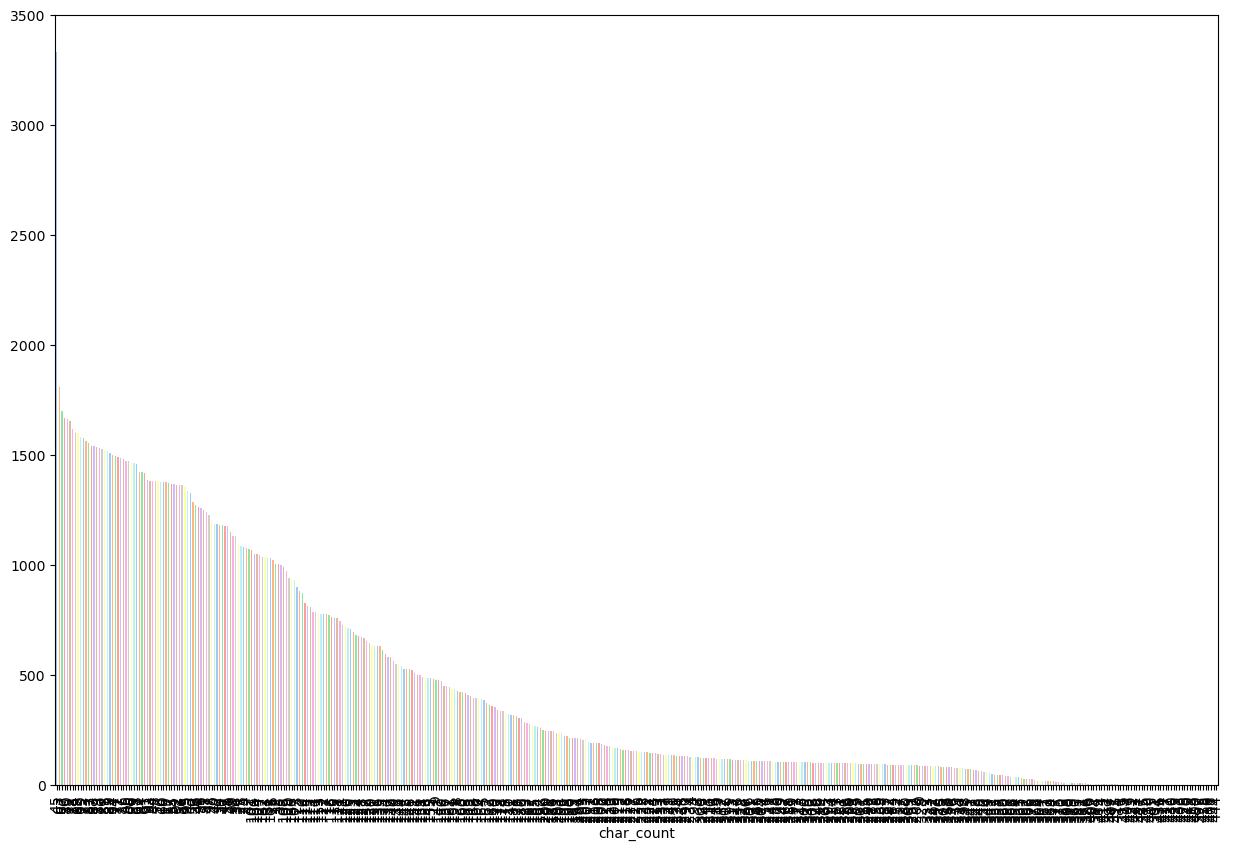

In [46]:
plt.figure(figsize=(15,10))
df_without_null['char_count'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))

In [47]:
data = df_without_null.copy()

In [48]:
data_copy = df_without_null.copy()

In [49]:
data_copy.head()

,claim_description,coverage_code,accident_source,word_count,char_count
0,iv making left turn green arrow pedestrian ran...,AN,"Struck pedestrian, bicycle",22,133
1,claimant alleges suffered injuries elevator,GB,Elevator/Escalator,5,43
2,iv passenger sustained injuries ov iv collided...,AB,Sideswipe or lane change,13,77
3,claimant alleges burned unknown degree hot tea...,PA,Food Product,17,108
4,iv merging construction zone rear ended theov ...,AD,Struck vehicle in rear,15,97


In [50]:
data_copy.char_count.value_counts()

char_count
45     3334
63     1811
67     1698
70     1670
80     1662
       ... 
458       1
418       1
408       1
437       1
444       1
Name: count, Length: 435, dtype: int64

In [51]:
data_copy.shape

(191463, 5)

In [52]:
data_copy[(data_copy['char_count'] == 0)]

,claim_description,coverage_code,accident_source,word_count,char_count
1458,,AB,Alleged damage to property of others,1,0
4694,,AB,Sideswipe or lane change,1,0
6552,,AP,Windshield,1,0
9249,,AB,Sideswipe or lane change,1,0
10403,,AD,Vehicle - Operated by other party,1,0
...,...,...,...,...,...
185277,,AD,Sideswipe or lane change,1,0
186629,,AP,Windshield,1,0
187835,,AD,Struck vehicle in rear,1,0
189351,,PB,Water,1,0


In [53]:
data_copy.isnull().sum()

claim_description    0
coverage_code        0
accident_source      0
word_count           0
char_count           0
dtype: int64

In [54]:
data_copy[data_copy['char_count'] > 0]

,claim_description,coverage_code,accident_source,word_count,char_count
0,iv making left turn green arrow pedestrian ran...,AN,"Struck pedestrian, bicycle",22,133
1,claimant alleges suffered injuries elevator,GB,Elevator/Escalator,5,43
2,iv passenger sustained injuries ov iv collided...,AB,Sideswipe or lane change,13,77
3,claimant alleges burned unknown degree hot tea...,PA,Food Product,17,108
4,iv merging construction zone rear ended theov ...,AD,Struck vehicle in rear,15,97
...,...,...,...,...,...
191685,wood fell hit guests legs,GB,Alleged lack of security,5,25
191686,female fell platform bus reg bkywl,AB,Not Otherwise Classified,6,34
191687,iwas driving downhill customer yard wet slippe...,AD,Sideswipe or lane change,12,79
191688,donna george walking register fell injuries ba...,PM,Alleged Negligent Act,8,53


In [55]:
data_copy.shape

(191463, 5)

In [56]:
data_copy[data_copy['char_count']>=10]

,claim_description,coverage_code,accident_source,word_count,char_count
0,iv making left turn green arrow pedestrian ran...,AN,"Struck pedestrian, bicycle",22,133
1,claimant alleges suffered injuries elevator,GB,Elevator/Escalator,5,43
2,iv passenger sustained injuries ov iv collided...,AB,Sideswipe or lane change,13,77
3,claimant alleges burned unknown degree hot tea...,PA,Food Product,17,108
4,iv merging construction zone rear ended theov ...,AD,Struck vehicle in rear,15,97
...,...,...,...,...,...
191685,wood fell hit guests legs,GB,Alleged lack of security,5,25
191686,female fell platform bus reg bkywl,AB,Not Otherwise Classified,6,34
191687,iwas driving downhill customer yard wet slippe...,AD,Sideswipe or lane change,12,79
191688,donna george walking register fell injuries ba...,PM,Alleged Negligent Act,8,53


In [57]:
data_copy[data_copy['char_count']<=50]

,claim_description,coverage_code,accident_source,word_count,char_count
1,claimant alleges suffered injuries elevator,GB,Elevator/Escalator,5,43
5,ov sitting stop light waiting turn iv ov,AD,Struck vehicle in rear,8,40
17,claimant suffered property damage due excavation,GD,"Excavation, trench, tunnel",6,48
21,cracked windshield,AD,Vehicle - passenger,2,18
22,third party hit customer rear causing damage loss,AU,Hit in Rear by Third Party,8,49
...,...,...,...,...,...
191681,iv ov backing time collided,AD,Sideswipe or lane change,5,27
191683,package car leaked oil concrete driveway,AD,Oil or grease,6,40
191684,passenger bus,AB,Struck vehicle in rear,2,13
191685,wood fell hit guests legs,GB,Alleged lack of security,5,25


In [58]:
data_copy[data_copy['char_count']<=10]

,claim_description,coverage_code,accident_source,word_count,char_count
41,unknown,PB,Not Otherwise Classified,1,7
94,lr wheel,GD,Alleged Negligent Act,2,8
141,ov hit iv,AP,Sideswipe or lane change,3,9
351,slip fall,GB,Alleged Negligent Act,2,9
464,ov iv,AP,Sideswipe or lane change,2,5
...,...,...,...,...,...
191375,unknown,PA,Alleged contamination or spoilage,1,7
191435,v hit v,AD,Struck vehicle in rear,3,7
191441,overpsray,GD,Alleged Negligent Act,1,9
191464,contents,RC,"Plumbing,Heating,AC,Discharge,Overflowing",1,8


In [59]:
data_copy[(data_copy['char_count'] > 10) & (data_copy['char_count'] <= 20)]

,claim_description,coverage_code,accident_source,word_count,char_count
21,cracked windshield,AD,Vehicle - passenger,2,18
36,agg uuw foot chase,NS,"Human Action, NOC",4,18
39,lost balance backing,GB,Ground/floor,3,20
86,id rear ended ov,AD,Struck vehicle in rear,4,16
118,clmt fell unit,GB,"Animal, Insect",3,14
...,...,...,...,...,...
191566,rock vehicle license,AP,Windshield,3,20
191606,rock road one fault,AP,Windshield,4,19
191641,iv broadsided rolled,AP,"Jacknife, rollover, overturned vehicle",3,20
191659,v struck parked v,AD,Struck parked vehicle,4,17


In [60]:
data_copy[(data_copy['accident_source'] == 'Struck parked vehicle') & 
      (data_copy['char_count'] > 10) & 
      (data_copy['char_count'] <= 20)]

,claim_description,coverage_code,accident_source,word_count,char_count
169,iv backed parked ov,AD,Struck parked vehicle,4,19
418,iv hit parked ov,AD,Struck parked vehicle,4,16
2296,tail swing hit car,AD,Struck parked vehicle,4,18
2423,parked vehicle,AD,Struck parked vehicle,2,14
2531,iv hit ov parked car,AD,Struck parked vehicle,5,20
...,...,...,...,...,...
190414,v hit parked v,AD,Struck parked vehicle,4,14
190500,iv hit parked ov,AD,Struck parked vehicle,4,16
190503,iv backed parked cv,AD,Struck parked vehicle,4,19
191074,iv backed another iv,AP,Struck parked vehicle,4,20


After carefully analyzing, we see that character count less than 10 does not make meaningful content and might not be relevant in prediting the correct target variables.

So, we see some pattern in character count more than 10 and less than 20. So, we are dropping the rows where character count is less than or equal to 10.

In [63]:
data_copy = data_copy[data_copy['char_count']>10].reset_index(drop=True)

In [64]:
data_copy.shape

(188872, 5)

In [65]:
data_copy['coverage_code'].value_counts()

coverage_code
AD    49958
GB    33217
GD    26761
AP    22859
AB    13737
AL    10448
PA     8912
PB     5528
RB     5100
NS     2342
AU     1547
PM     1430
EL      905
AN      811
PL      737
GK      672
RC      620
PI      519
GO      382
AM      363
LL      281
DC      265
GL      250
EP      209
IK      184
OM      148
EO      143
PP      125
TE      107
IM       93
BM       69
BL       39
CM       30
FB       24
RF       17
OI       14
BR        8
RQ        5
EB        4
FF        3
LS        3
EI        2
PC        1
Name: count, dtype: int64

In [66]:
data_copy = data_copy.drop(columns = ['word_count', 'char_count'])

In [67]:
# Calculate value counts of coverage_code
value_counts = data_copy['coverage_code'].value_counts()

# Filter the DataFrame to keep only those rows where coverage_code has a count of 10 or more
valid_codes = value_counts[value_counts >= 10].index
filtered_data_copy = data_copy[data_copy['coverage_code'].isin(valid_codes)]

# Display the filtered DataFrame
print(filtered_data_copy)

                                        claim_description coverage_code  \
0       iv making left turn green arrow pedestrian ran...            AN   
1             claimant alleges suffered injuries elevator            GB   
2       iv passenger sustained injuries ov iv collided...            AB   
3       claimant alleges burned unknown degree hot tea...            PA   
4       iv merging construction zone rear ended theov ...            AD   
...                                                   ...           ...   
188867                          wood fell hit guests legs            GB   
188868                 female fell platform bus reg bkywl            AB   
188869  iwas driving downhill customer yard wet slippe...            AD   
188870  donna george walking register fell injuries ba...            PM   
188871  unit traveling eastbound sh behind unit towing...            AB   

                   accident_source  
0       Struck pedestrian, bicycle  
1               Elevator/

In [68]:
filtered_data_copy.head()

,claim_description,coverage_code,accident_source
0,iv making left turn green arrow pedestrian ran...,AN,"Struck pedestrian, bicycle"
1,claimant alleges suffered injuries elevator,GB,Elevator/Escalator
2,iv passenger sustained injuries ov iv collided...,AB,Sideswipe or lane change
3,claimant alleges burned unknown degree hot tea...,PA,Food Product
4,iv merging construction zone rear ended theov ...,AD,Struck vehicle in rear


### Text Vectorization and Label Encoding for data sample

We are vectorizing the claim_description column and then encoding both the target columns.

For further analysis, we have created buckets where in we cna classify high, medium and low occurences of the target variables.

In [82]:
# Function to sample the dataset
def sample_data(df, fraction=0.1):
    """Return a random sample of the DataFrame."""
    return df.sample(frac=fraction, random_state=42)

# Function to vectorize the text data
def vectorize_data(df):
    """Convert claim descriptions to TF-IDF vectors."""
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(df['claim_description']), vectorizer

# Function to encode target variables
def encode_targets(df):
    """Encode categorical target variables."""
    le_coverage = LabelEncoder()
    le_accident = LabelEncoder()
    df['coverage_code_encoded'] = le_coverage.fit_transform(df['coverage_code'])
    df['accident_source_encoded'] = le_accident.fit_transform(df['accident_source'])
    return df, le_coverage, le_accident

# Function to bucket labels based on occurrence
def bucket_labels(series):
    """Bucket labels into high, medium, and low based on occurrence."""
    counts = series.value_counts()
    thresholds = {
        'high': counts.quantile(0.66),
        'medium': counts.quantile(0.33),
        'low': counts.min()
    }
    return series.map(lambda x: 'high' if counts[x] > thresholds['high'] else
                             ('medium' if counts[x] > thresholds['medium'] else 'low'))

# Process the DataFrame
def process_data(df, output_filename='processed_data_sampled.xlsx'):
    """Process the DataFrame to vectorize, encode, and bucket."""
    # Sample the data
    sampled_data = sample_data(df, fraction=0.2)  # Adjust fraction as needed

    # Vectorize claim descriptions
    X_claim_description, vectorizer = vectorize_data(sampled_data)

    # Encode target variables
    sampled_data, le_coverage, le_accident = encode_targets(sampled_data)

    # Bucket labels
    sampled_data['coverage_bucket'] = bucket_labels(sampled_data['coverage_code'])
    sampled_data['accident_bucket'] = bucket_labels(sampled_data['accident_source'])

    # Save to Excel only if the file doesn't already exist
    if not output_filename in os.listdir():
        sampled_data.to_excel(output_filename, index=False)
        print(f"Processed sampled data saved to '{output_filename}'")
    else:
        print(f"File '{output_filename}' already exists. No new file saved.")

# Run the processing
process_data(filtered_data_copy)


File 'processed_data_sampled.xlsx' already exists. No new file saved.


### Saving the file to excel

In [83]:
# Load the processed data
processed_data = pd.read_excel('processed_data_sampled.xlsx')
processed_data

,claim_description,coverage_code,accident_source,coverage_code_encoded,accident_source_encoded,coverage_bucket,accident_bucket
0,driving northbound center lane cars stopped fr...,AD,Sideswipe or lane change,1,195,high,high
1,tripped pallet pallet jack hurt back,GB,Pallet,14,173,high,medium
2,child suffered fracture right lower leg detail...,PM,Alleged lack of supervision - schools,28,21,medium,high
3,exterior breezeway hardi plank plywood fell re...,GB,Not Otherwise Classified,14,158,high,high
4,claimant alleges child cut finger knife dining...,GB,Alleged Negligent Act,14,6,high,high
...,...,...,...,...,...,...,...
7549,employee gas station parking lot purchase fuel...,AP,Our vehicle backed into,5,166,high,high
7550,iv driver attempted merge ov driver lane strik...,AD,Sideswipe or lane change,1,195,high,high
7551,pm neighbor backyard separated parking lot fen...,GD,"Tree, bush, shrub",15,233,high,high
7552,mbm claims driving car park hit bya green nissan,GB,Not Otherwise Classified,14,158,high,high


In [94]:
cov_code_10 = processed_data.coverage_code_encoded.value_counts()
cov_code_10

coverage_code_encoded
1     1984
14    1333
15    1029
5      939
0      597
2      391
24     341
25     226
30     202
22     105
6       74
28      53
16      42
4       38
10      37
31      25
27      25
3       19
26      18
18      17
9       15
19       7
12       7
21       7
17       7
11       3
29       3
20       3
23       2
32       2
7        1
8        1
13       1
Name: count, dtype: int64

As the coverage_code has less than 10 values in few of the categrories, which miay not be useful for the analysis compared to the huge amount of other categories, we are dropping them.

In [98]:
# Step 1: Count occurrences of each value in coverage_code_encoded
cov_code_counts = processed_data['coverage_code_encoded'].value_counts()

# Step 2: Create a mask for values with counts of 10 or more
valid_codes = cov_code_counts[cov_code_counts >= 10].index

# Step 3: Filter the DataFrame to keep only those rows
filtered_final_data = processed_data[processed_data['coverage_code_encoded'].isin(valid_codes)]

# Reset index if needed
filtered_final_data.reset_index(drop=True, inplace=True)

# Save the final filtered DataFrame to an Excel file
filtered_final_data.to_excel('filtered_final_data.xlsx', index=False)
print("Final filtered data saved to 'filtered_final_data.xlsx'")

Final filtered data saved to 'filtered_final_data.xlsx'


In [100]:
filtered_final_data.head()

,claim_description,coverage_code,accident_source,coverage_code_encoded,accident_source_encoded,coverage_bucket,accident_bucket
0,driving northbound center lane cars stopped fr...,AD,Sideswipe or lane change,1,195,high,high
1,tripped pallet pallet jack hurt back,GB,Pallet,14,173,high,medium
2,child suffered fracture right lower leg detail...,PM,Alleged lack of supervision - schools,28,21,medium,high
3,exterior breezeway hardi plank plywood fell re...,GB,Not Otherwise Classified,14,158,high,high
4,claimant alleges child cut finger knife dining...,GB,Alleged Negligent Act,14,6,high,high


In [102]:
filtered_final_data.coverage_code_encoded.value_counts()

coverage_code_encoded
1     1984
14    1333
15    1029
5      939
0      597
2      391
24     341
25     226
30     202
22     105
6       74
28      53
16      42
4       38
10      37
31      25
27      25
3       19
26      18
18      17
9       15
Name: count, dtype: int64

# 4. Model Selection, Training and Prediction

Now using the new file after all preprocessing are done. We are splitting the dataset and training models.

We employed two major machine learning models to classify.

1. Random Forest and

2. XG Boost

### Coverage Code Prediction

           Model  Train Precision  Train Recall  Test Precision  Test Recall
0  Random Forest         0.695322      0.680964        0.467955     0.177097
1        XGBoost         0.970793      0.970477        0.579909     0.591877


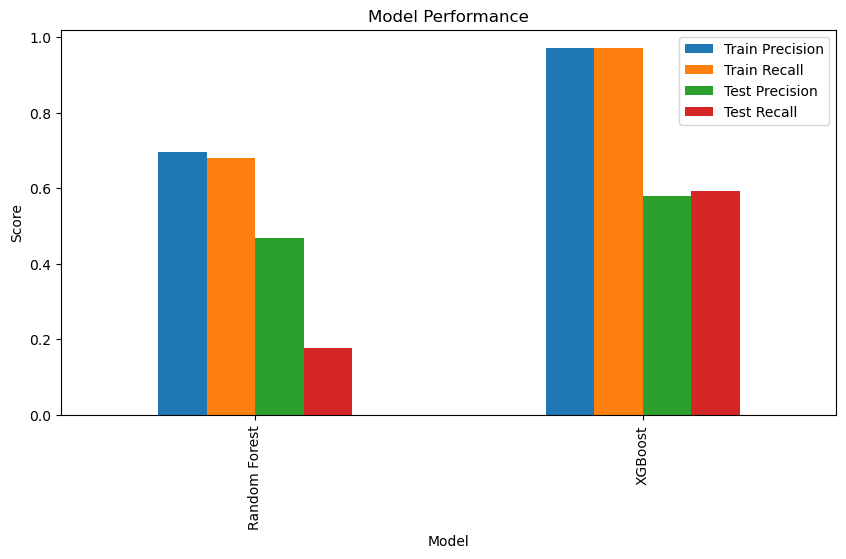

Processed data saved to 'processed_data_with_predictions.xlsx'


In [108]:
# Function to vectorize the text data
def vectorize_data(df):
    """Convert claim descriptions to TF-IDF vectors."""
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(df['claim_description']), vectorizer
    

# Function to split and balance data
def split_and_balance(X, y):
    """Split data into training and testing sets and apply SMOTE for balancing."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    smote = SMOTE(random_state=10)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    return X_train_balanced, X_test, y_train_balanced, y_test

# Model training and evaluation functions
def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=10)
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5]
    }
    grid_search = RandomizedSearchCV(model, param_grid, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    return y_pred_train, y_pred_test, precision_score(y_test, y_pred_test, average='weighted'), recall_score(y_test, y_pred_test, average='weighted')

def train_and_evaluate_xgboost(X_train, y_train, X_test, y_test):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    param_dist = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.1, 0.2]
    }
    random_search = RandomizedSearchCV(model, param_dist, n_iter=4, scoring='f1_weighted', cv=3, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    return y_pred_train, y_pred_test, precision_score(y_test, y_pred_test, average='weighted'), recall_score(y_test, y_pred_test, average='weighted')
def run_all_models(data):
    # Vectorize claim descriptions
    X_claim_description, vectorizer = vectorize_data(data)
    y = data['coverage_code_encoded']  # Target variable

    # Split and balance data
    X_train, X_test, y_train, y_test = split_and_balance(X_claim_description, y)

    results = []

    # Evaluate all models
    for model_name in ["Random Forest", "XGBoost"]:
        if model_name == "Random Forest":
            y_pred_train, y_pred_test, precision, recall = train_and_evaluate_random_forest(X_train, y_train, X_test, y_test)
        elif model_name == "XGBoost":
            y_pred_train, y_pred_test, precision, recall = train_and_evaluate_xgboost(X_train, y_train, X_test, y_test)

        results.append({
            'Model': model_name,
            'Train Precision': precision_score(y_train, y_pred_train, average='weighted'),
            'Train Recall': recall_score(y_train, y_pred_train, average='weighted'),
            'Test Precision': precision,
            'Test Recall': recall
        })

        # Add predictions to the DataFrame using the original indices of X_test
        original_indices = y_test.index
        data.loc[original_indices, f'predicted_coverage_code_{model_name.lower()}'] = y_pred_test

    # Create a DataFrame for results and display
    results_df = pd.DataFrame(results)
    print(results_df)  # Display metrics in Jupyter

    # Visualize results
    results_df.set_index('Model')[['Train Precision', 'Train Recall', 'Test Precision', 'Test Recall']].plot(kind='bar', figsize=(10, 5), title='Model Performance')
    plt.ylabel('Score')
    plt.show()

    # Save the processed data with predictions to Excel
    output_file = 'processed_data_with_predictions.xlsx'
    data.to_excel(output_file, index=False)
    print(f"Processed data saved to '{output_file}'")

# Run all models automatically
run_all_models(filtered_final_data)

### Accident Source Prediction

                             Model  Train Precision  Train Recall  \
0  Random Forest - Accident Source         0.647615      0.543431   
1        XGBoost - Accident Source         0.738987      0.681563   

   Test Precision  Test Recall  
0        0.265538     0.223702  
1        0.615592     0.373502  


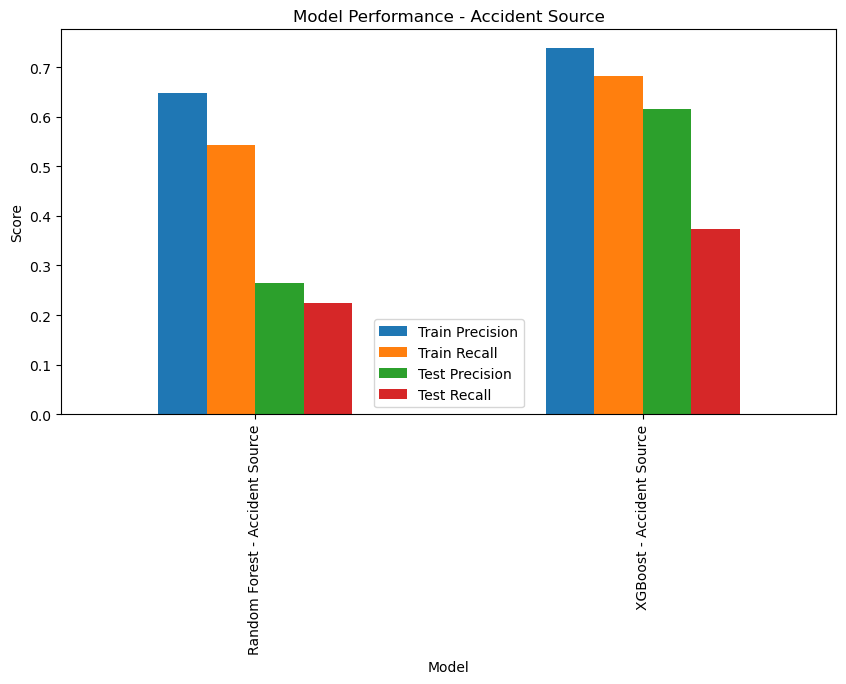

Processed data saved to 'processed_data_with_predictions_accident_source.xlsx'


In [112]:
# Function to vectorize the text data
def vectorize_accident_source(df):
    """Convert accident sources to TF-IDF vectors."""
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(df['accident_source']), vectorizer

# Function to split and balance data
def split_and_balance_accident_source(X, y):
    """Split data into training and testing sets and apply SMOTE for balancing."""
    X_train_accident, X_test_accident, y_train_accident, y_test_accident = train_test_split(X, y, test_size=0.2, random_state=10)
    smote = SMOTE(random_state=10)
    X_train_balanced_accident, y_train_balanced_accident = smote.fit_resample(X_train_accident, y_train_accident)
    return X_train_balanced_accident, X_test_accident, y_train_balanced_accident, y_test_accident

# Model training and evaluation functions
def train_and_evaluate_random_forest_accident(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=10)
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5]
    }
    grid_search = RandomizedSearchCV(model, param_grid, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    return y_pred_train, y_pred_test, precision_score(y_test, y_pred_test, average='weighted'), recall_score(y_test, y_pred_test, average='weighted')

def train_and_evaluate_xgboost_accident(X_train, y_train, X_test, y_test):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    param_dist = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.1, 0.2]
    }
    random_search = RandomizedSearchCV(model, param_dist, n_iter=4, scoring='f1_weighted', cv=3, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    return y_pred_train, y_pred_test, precision_score(y_test, y_pred_test, average='weighted'), recall_score(y_test, y_pred_test, average='weighted')

def run_all_models_accident_source(data):
    # Vectorize accident sources
    X_accident_source, vectorizer = vectorize_accident_source(data)
    y = data['coverage_code_encoded']  # Target variable

    # Split and balance data
    X_train_accident, X_test_accident, y_train_accident, y_test_accident = split_and_balance_accident_source(X_accident_source, y)

    results = []

    # Evaluate all models
    for model_name in ["Random Forest - Accident Source", "XGBoost - Accident Source"]:
        if model_name.startswith("Random Forest"):
            y_pred_train, y_pred_test, precision, recall = train_and_evaluate_random_forest_accident(X_train_accident, y_train_accident, X_test_accident, y_test_accident)
        elif model_name.startswith("XGBoost"):
            y_pred_train, y_pred_test, precision, recall = train_and_evaluate_xgboost_accident(X_train_accident, y_train_accident, X_test_accident, y_test_accident)

        results.append({
            'Model': model_name,
            'Train Precision': precision_score(y_train_accident, y_pred_train, average='weighted'),
            'Train Recall': recall_score(y_train_accident, y_pred_train, average='weighted'),
            'Test Precision': precision,
            'Test Recall': recall
        })

        # Add predictions to the DataFrame using the original indices of X_test
        original_indices = y_test_accident.index
        data.loc[original_indices, f'predicted_coverage_code_accident_source_{model_name.lower().replace(" ", "_")}'] = y_pred_test

    # Create a DataFrame for results and display
    results_df = pd.DataFrame(results)
    print(results_df)  # Display metrics in Jupyter

    # Visualize results
    results_df.set_index('Model')[['Train Precision', 'Train Recall', 'Test Precision', 'Test Recall']].plot(kind='bar', figsize=(10, 5), title='Model Performance - Accident Source')
    plt.ylabel('Score')
    plt.show()

    # Save the processed data with predictions to Excel
    output_file = 'processed_data_with_predictions_accident_source.xlsx'
    data.to_excel(output_file, index=False)
    print(f"Processed data saved to '{output_file}'")

# Run all models automatically for accident source
run_all_models_accident_source(filtered_final_data)

# 5. CONCLUSION

We found out that XG Boost performs better in predicting Coverage Code and Accident Source. 

It works well on Training data but not on Test data.

Also, precision is greater than recall in all cases of Random Forest and XG Boost.

In this project, we built multiple machine learning models to classify accident sources based on textual data. The **XGBoost** model performed the best with high Precision and Recall, making it suitable for real-world applications where predicting coverage codes and accident sources are critical.

### Next Steps:

- **Further Tuning**: Experiment with different hyperparameter tuning strategies to further improve model performance.
- **Deploy the Model**: Use the best-performing model in a real-world environment by deploying it as a web service or integrating it into existing systems.
- **Feature Importance**: Investigate feature importance to understand which aspects of the data contribute most to the classification.